<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_20_Seaborn Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Top Companies Bar Plot (2.20.1)

In [2]:
import seaborn as sns

In [3]:
# Only get Data Scientist jobs in United States and drop NaN values from ['salary_year_avg'] column for visualisation

df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

In [18]:
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].agg('median').sort_values(ascending=False).head(5)
top_companies = top_companies.reset_index()
top_companies

,company_name,salary_year_avg
0,ReServe,585000.0
1,"East River Electric Power Cooperative, Inc.",537000.0
2,Lands End,375000.0
3,"Analog Devices, Inc",375000.0
4,Blue Cross and Blue Shield of Minnesota,375000.0


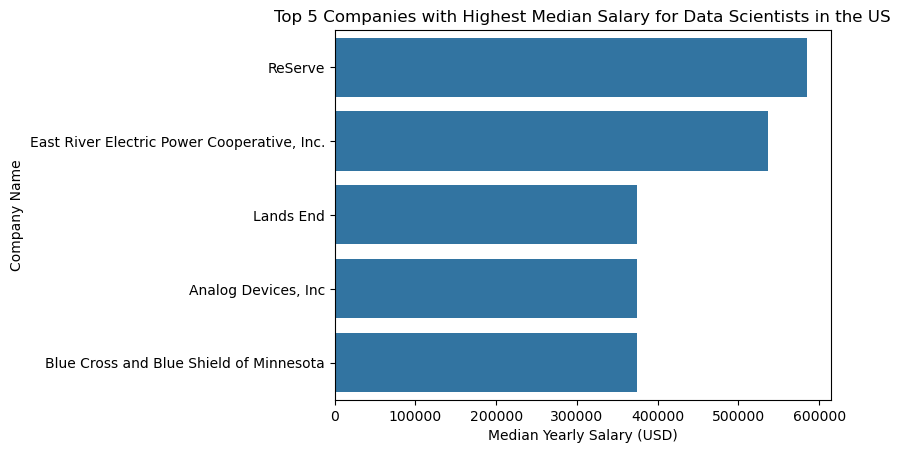

In [19]:
sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

---

## 🟨 Data Scientist Salary Histogram (2.20.2)

Text(0.5, 0, 'Yearly Salary (USD)')

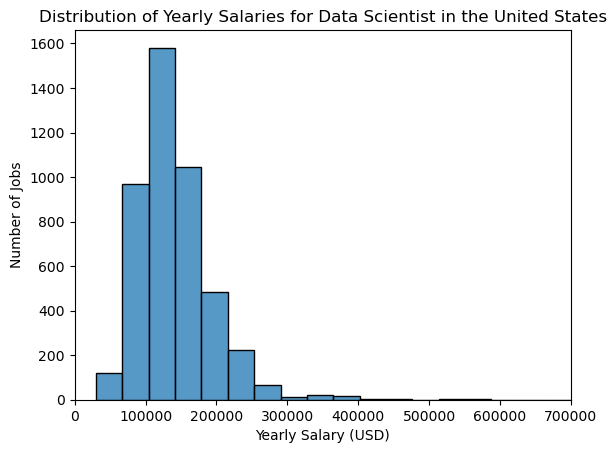

In [20]:
sns.histplot(df_DS_US['salary_year_avg'], bins=25)
plt.xlim(0, 700000)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary (USD)')

---

## 🟨 Data Roles Salary Box Plot (2.20.3)

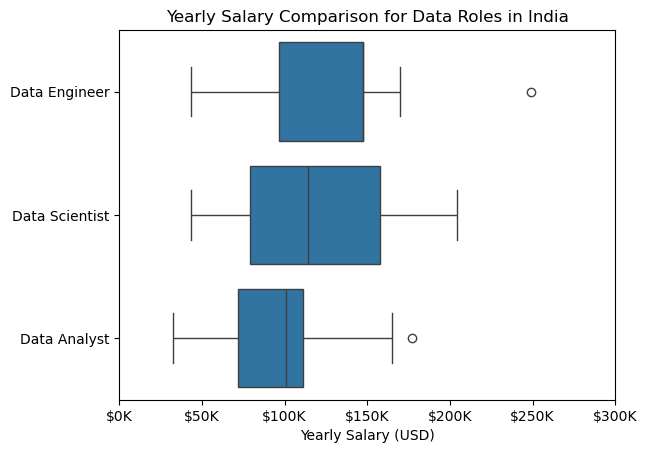

In [26]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_IN = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].dropna(subset=['salary_year_avg']).copy()

# job_list = [df_IN[df_IN['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

sns.boxplot(df_IN, x='salary_year_avg', y='job_title_short')

# plt.boxplot(job_list, labels=job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 300000)
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.show()


---

## 🟨 Salary Distribution for United States (2.20.4)

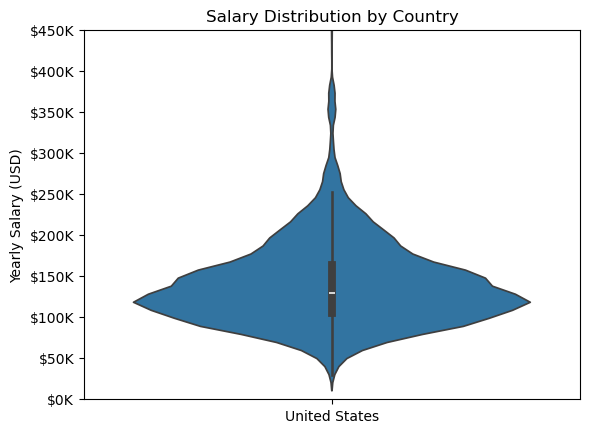

In [28]:
sns.violinplot(df_DS_US, x='job_country', y='salary_year_avg')
plt.ylim(0, 450000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.show()

---